In [1]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file(f"mapNYC.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


In [14]:
dfP = pd.read_csv('P.csv', na_values=[':'], low_memory=False)

In [15]:
dfD = pd.read_csv('D.csv', na_values=[':'], low_memory=False)

In [26]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   245 non-null    int64  
 1   Region       245 non-null    int64  
 2   02D          245 non-null    int64  
 3   03D          245 non-null    int64  
 4   04D          245 non-null    int64  
 5   05D          245 non-null    int64  
 6   06D          245 non-null    int64  
 7   07D          245 non-null    int64  
 8   08D          245 non-null    int64  
 9   09D          245 non-null    int64  
 10  10D          245 non-null    int64  
 11  11D          245 non-null    int64  
 12  12D          245 non-null    int64  
 13  211D         245 non-null    int64  
 14  212D         245 non-null    int64  
 15  Unnamed: 15  0 non-null      float64
 16  D03          245 non-null    int64  
 17  D04          245 non-null    int64  
 18  D05          245 non-null    int64  
 19  D06     

In [16]:
ppdP = pd.merge(gdf, dfP, left_on='LocationID', right_on='LocationID', how='inner').reset_index()
ppdP.shape

(222, 35)

NameError: name 'tfont' is not defined

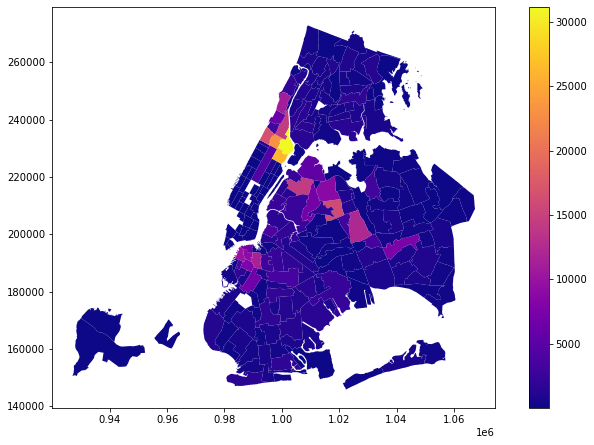

In [17]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
ppdP.plot(column='02P', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Spatial distribution of taxi pick up point region in pre-Covid", x=0.025, size=24, **tfont);
plt.savefig('Cluster-House-Prices-Raw.png', dpi=150)

NameError: name 'tfont' is not defined

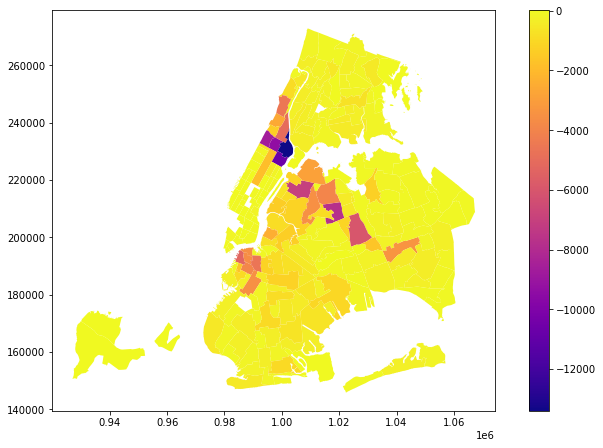

In [18]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
ppdP.plot(column='P03', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Spatial distribution of taxi pick up point region in pre-Covid", x=0.025, size=24, **tfont);
plt.savefig('Cluster-House-Prices-Raw.png', dpi=150)

In [27]:
ppdD

,index,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Unnamed: 0,02P,...,P05,P06,P07,P08,P09,P10,P11,P12,P13,P14
0,0,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",126,369,...,85,-19,6,28,38,33,-43,-5,26,-54
1,1,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",185,80,...,-2,7,2,17,-13,10,-3,-9,7,-10
2,2,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",5,14441,...,73,-45,180,279,280,610,-51,-234,-309,-361
3,3,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993 216615.925, 1043849.708 ...",144,266,...,8,21,7,19,2,-3,-21,3,5,-18
4,4,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ...",107,503,...,43,36,-1,62,-25,64,7,-37,22,-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,217,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",117,441,...,93,3,2,72,-37,9,-3,-41,3,-23
218,218,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",15,6975,...,113,-25,20,109,58,255,-96,-102,-223,43
219,219,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",206,42,...,0,4,5,-5,7,-4,1,-2,3,-3
220,220,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",195,49,...,4,6,10,5,3,-13,0,1,6,1


In [31]:
ppdD = pd.merge(gdf, dfD, left_on='LocationID', right_on='Region', how='inner').reset_index()
ppdD.shape

(244, 36)

In [37]:
ppdP

,index,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Unnamed: 0,02P,...,P05,P06,P07,P08,P09,P10,P11,P12,P13,P14
0,0,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",126,369,...,85,-19,6,28,38,33,-43,-5,26,-54
1,1,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",185,80,...,-2,7,2,17,-13,10,-3,-9,7,-10
2,2,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",5,14441,...,73,-45,180,279,280,610,-51,-234,-309,-361
3,3,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993 216615.925, 1043849.708 ...",144,266,...,8,21,7,19,2,-3,-21,3,5,-18
4,4,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ...",107,503,...,43,36,-1,62,-25,64,7,-37,22,-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,217,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",117,441,...,93,3,2,72,-37,9,-3,-41,3,-23
218,218,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",15,6975,...,113,-25,20,109,58,255,-96,-102,-223,43
219,219,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",206,42,...,0,4,5,-5,7,-4,1,-2,3,-3
220,220,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",195,49,...,4,6,10,5,3,-13,0,1,6,1


In [109]:
import matplotlib
loc = matplotlib.get_cachedir()
!ls {loc}

fontlist-v330.json


In [ ]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]
print(fonts)

In [119]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

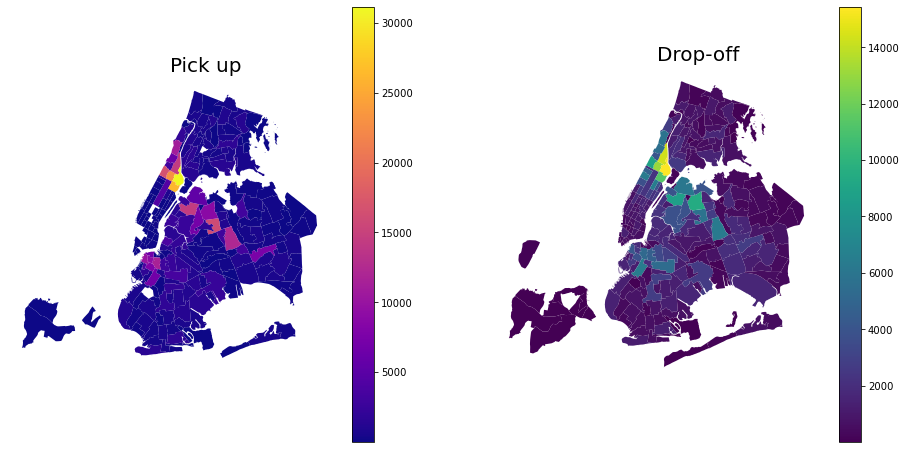

In [132]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='02P', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='02D', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('NYC_pre.png', dpi=150)


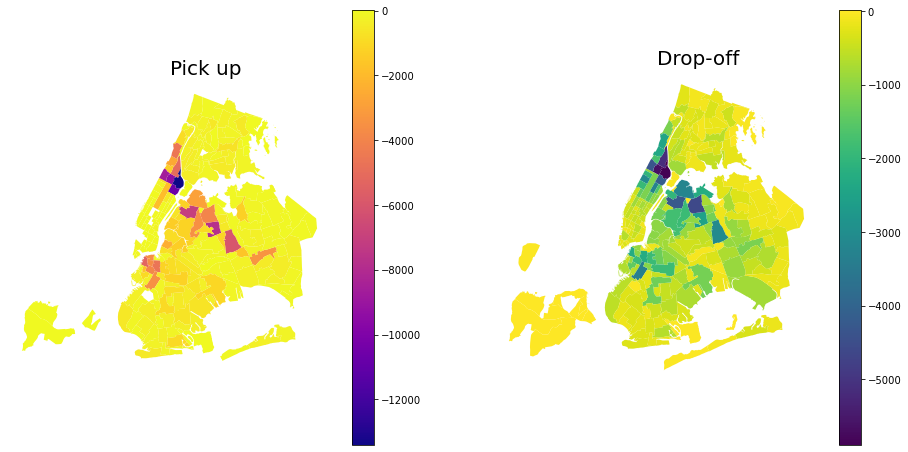

In [137]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='P03', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='D03', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('NYC_after.png', dpi=150)

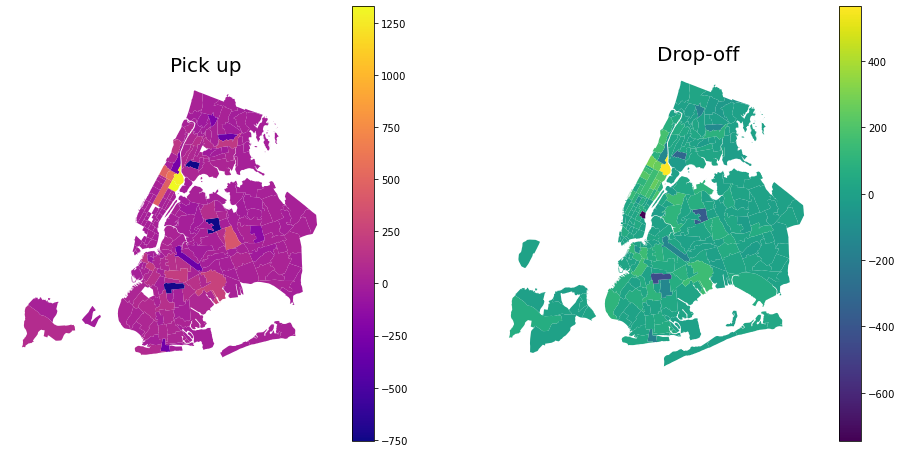

In [140]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='P06', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='D06', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('NYC_june.png', dpi=150)

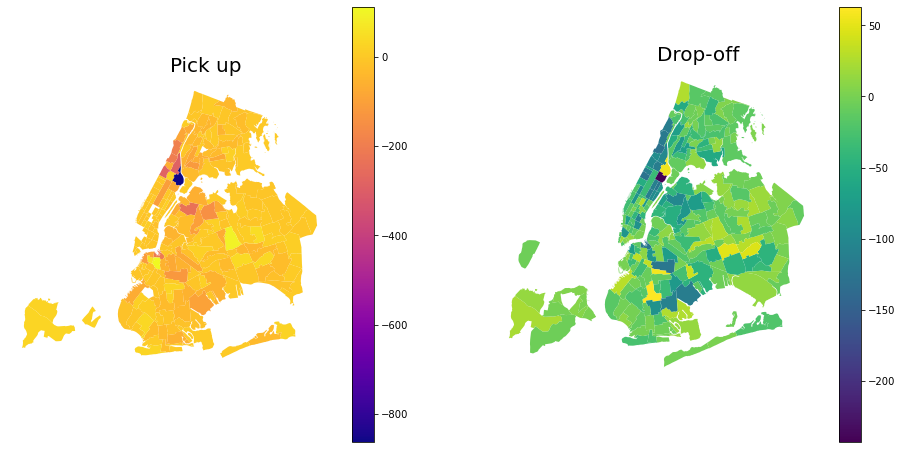

In [141]:
f,axes = plt.subplots(1,2,figsize=(16,8))

ppdP.plot(column='P12', ax=axes[0], legend=True, cmap='plasma')
ppdD.plot(column='D12', ax=axes[1], legend=True, cmap='viridis')
for ax in axes:
    ax.axis('off')

    
    
axes[0].set_title('Pick up', size=20, **tfont)
axes[1].set_title('Drop-off', size=20, **tfont)

plt.savefig('NYC_Dec.png', dpi=150)

In [146]:
LA = 'New York city'

NameError: name 'tfont' is not defined

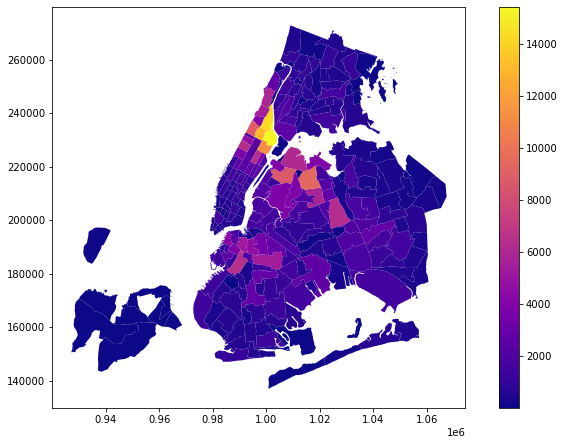

In [33]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
ppdD.plot(column='02D', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Spatial distribution of taxi pick up point region in pre-Covid", x=0.025, size=24, **tfont);
plt.savefig('Cluster-House-Prices-Raw.png', dpi=150)

NameError: name 'tfont' is not defined

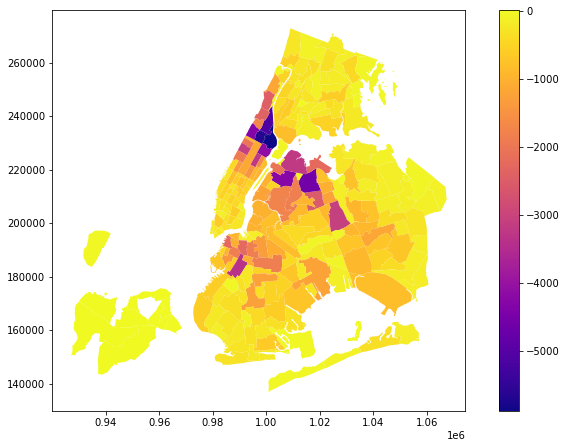

In [91]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
ppdD.plot(column='D03', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Spatial distribution of taxi pick up point region in pre-Covid", x=0.025, size=24);
plt.savefig('.png', dpi=150)


In [35]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [51]:
to_cluster = ppdP[['LocationID','02P','P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11']].set_index('LocationID').copy()
to_cluster.head()

,02P,P03,P04,P05,P06,P07,P08,P09,P10,P11
LocationID,,,,,,,,,,
3,369,-154,-168,85,-19,6,28,38,33,-43
4,80,-48,-21,-2,7,2,17,-13,10,-3
7,14441,-7039,-6989,73,-45,180,279,280,610,-51
9,266,-81,-144,8,21,7,19,2,-3,-21
10,503,-170,-214,43,36,-1,62,-25,64,7


In [54]:
normed = to_cluster.copy()
for c in to_cluster.columns.values:
    normed[c] = rs.fit_transform(to_cluster[c].values.reshape(-1,1))
normed.head()

,02P,P03,P04,P05,P06,P07,P08,P09,P10,P11
LocationID,,,,,,,,,,
3,-0.026731,0.021155,0.032916,0.272162,-0.330138,-0.130522,0.078329,0.304942,0.257998,-0.340426
4,-0.104371,0.086154,0.118555,-0.178849,-0.053248,-0.170683,-0.017406,-0.231335,0.020640,0.085106
7,3.753728,-4.200699,-3.940868,0.209953,-0.607029,1.616466,2.262837,2.849632,6.212590,-0.425532
9,-0.054402,0.065919,0.046898,-0.127009,0.095847,-0.120482,0.000000,-0.073607,-0.113519,-0.106383
10,0.009268,0.011344,0.006117,0.054432,0.255591,-0.200803,0.374238,-0.357518,0.577915,0.191489


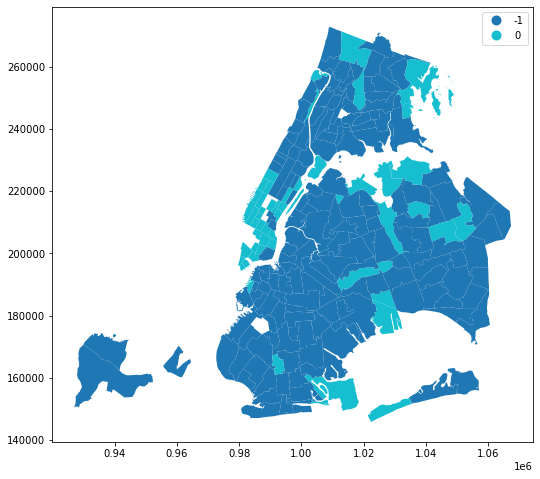

In [142]:
minPts = 10
epsilon = 0.1
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.

clusters = dbsc.labels_

ppdP['DBSCAN_Cluster'] = clusters
ppdP.plot(column='DBSCAN_Cluster', categorical=True, legend=True, figsize=(12,8));

In [74]:
from sklearn.cluster import KMeans

In [88]:
k_cluster = 4
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

KMeans(n_clusters=4, random_state=1)

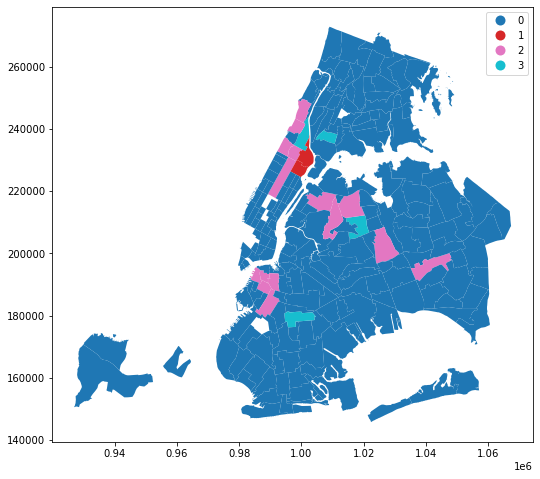

In [145]:
ppd['Kmeans_Cluster'] = kmeans_method.labels_
ppd.plot(column='Kmeans_Cluster', categorical=True, legend=True, figsize=(12,8));
plt.savefig('cluster.png', dpi=150)
